In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from khayyam import JalaliDate
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

In [7]:
# Load the data
data = pd.read_csv('df.csv')
print("Columns in the original file:", data.columns)

Columns in the original file: Index(['Address', 'weight', 'khanevartype', 'Takmil', 'province', 'town',
       'tenure', 'room', 'space', 'construction', 'material', 'vehicle',
       'motorcycle', 'bicycle', 'radio', 'radiotape', 'TVbw', 'TV',
       'VHS_VCD_DVD', 'computer', 'cellphone', 'freezer', 'refridgerator',
       'fridge', 'stove', 'vacuum', 'washingmachine', 'sewingmachine', 'fan',
       'evapcoolingportable', 'splitportable', 'dishwasher', 'microwave',
       'none', 'pipewater', 'electricity', 'pipegas', 'telephone', 'internet',
       'bathroom', 'kitchen', 'evapcooling', 'centralcooling',
       'centralheating', 'package', 'split', 'wastewater', 'cookingfuel',
       'heatingfuel', 'waterheatingfuel', 'Cost1', 'Cost2', 'Cost3', 'Cost4',
       'Cost5', 'Cost6', 'Cost7', 'Cost8', 'Cost9', 'Cost11', 'Cost12',
       'Cost13', 'Cost14', 'HousePrice1', 'HousePrice2', 'Fuel', 'Car_Fuel',
       'Benzin', 'Costs_sum', 'sum_netincome_w_m', 'sum_netincome_w_y', 'Fasl',
     

In [8]:
# Convert the 'year' column from Gregorian to Jalali
data['year'] = data['year'].apply(lambda x: JalaliDate(x, 1, 1).strftime('%Y'))

# Print the modified data to check the conversion
print(data.head())

       Address      weight  khanevartype  Takmil province  town  \
0  20001383908  171.199524             1       1  Markazi     1   
1  20001383911  171.199524             1       2  Markazi     1   
2  20001383915  171.199524             1       2  Markazi     1   
3  20001383916  171.199524             1       1  Markazi     1   
4  20001383920  171.199524             1       2  Markazi     1   

            tenure  room  space  construction  ... Fasl   Income_s_y  \
0  OwnedEstateLand     3  100.0           3.0  ...  2.0  342000000.0   
1  OwnedEstateLand     3   70.0           3.0  ...  2.0          0.0   
2  OwnedEstateLand     3  100.0           3.0  ...  2.0  214500000.0   
3  OwnedEstateLand     4  100.0           3.0  ...  2.0          0.0   
4  OwnedEstateLand     3  100.0           3.0  ...  2.0          0.0   

   sum03_incomes     Subsidy  total_income  total_income_month  year  state  \
0            0.0  21840000.0   363840000.0        3.032000e+07  0098      R   
1     

In [9]:
import matplotlib.ticker as mticker

def plot_household_expense_trend(data):
    plt.figure(figsize=(12, 6))  

    sns.lineplot(data=data, x='year', y='Cost11', marker='o', color='blue')
    plt.title('Household Expense Trend for Food, Hotel, and Restaurant', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Expense', fontsize=12)

    # تنظیم فرمت برای محور Y
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

    plt.tight_layout() 
    plt.show()


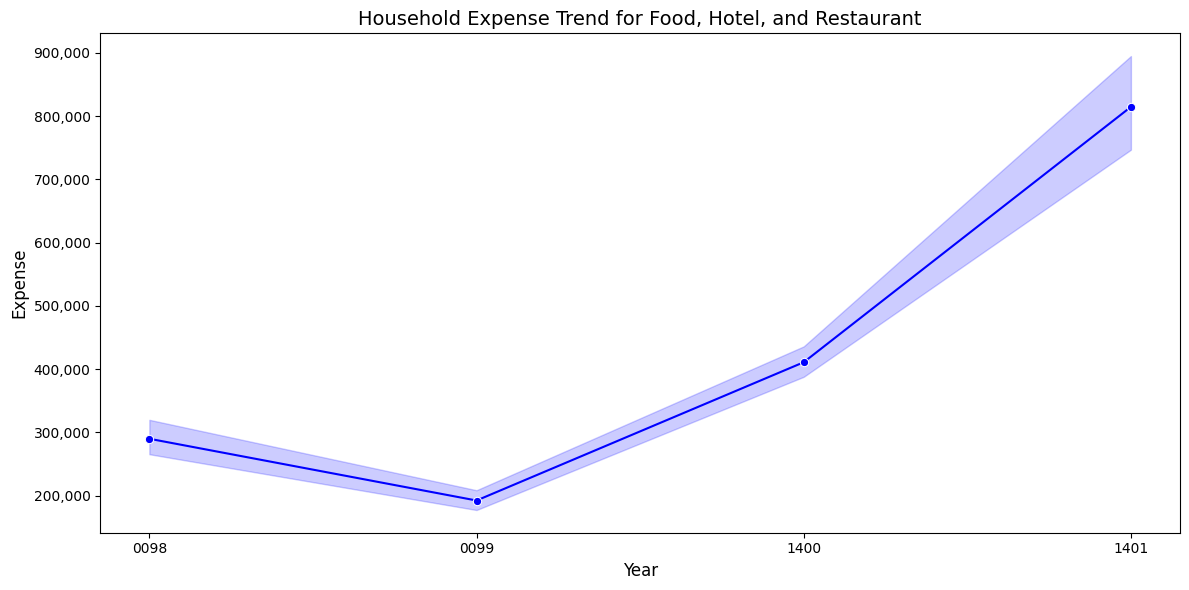

In [10]:
plot_household_expense_trend(data)